### Question 1: Data Wrangling

Question 1.1: Read CSV with Pandas

In [139]:
import pandas as pd
url1='https://drive.google.com/file/d/19p85w5O3ET4HMlJvYREUis0WqHOcwRyw/view'
url1='https://drive.google.com/uc?id=' + url1.split('/')[-2]
df1 = pd.read_csv(url1)
df1.head()

,id,department,work_hours,performance_score
0,1,Ward,10.0,37
1,2,OPD,9.0,106
2,3,ER,9.0,1
3,4,Ward,10.0,37
4,5,Ward,10.0,26


In [140]:
df1.shape

(1000, 4)

In [141]:
df1['department'].unique()

array(['Ward', 'OPD', 'ER', 'ICU'], dtype=object)

In [142]:
# drop duplicates
df1 = df1.drop_duplicates()
df1.shape

(1000, 4)

Question 1.2: Fill missing work_hours with mean

In [143]:
df1.isnull().sum()

,0
id,0
department,0
work_hours,98
performance_score,0


In [144]:
df1.fillna({'work_hours': df1['work_hours'].mean()}, inplace=True)
df1.isnull().sum()

,0
id,0
department,0
work_hours,0
performance_score,0


Question 1.3: Drop rows with performance_score outside of the range of 0 - 100

In [145]:
df1.describe()

,id,work_hours,performance_score
count,1000.000000,1000.000000,1000.000000
mean,500.500000,8.995565,55.408000
std,288.819436,0.787784,38.386261
min,1.000000,8.000000,-10.000000
25%,250.750000,8.000000,22.000000
50%,500.500000,9.000000,56.000000
75%,750.250000,10.000000,90.000000
max,1000.000000,10.000000,119.000000


In [146]:
df1 = df1[(df1['performance_score'] >= 0) & (df1['performance_score'] <= 100)]
df1.describe()

,id,work_hours,performance_score
count,757.000000,757.000000,757.000000
mean,506.319683,8.995592,50.190225
std,290.050640,0.787625,29.511020
min,1.000000,8.000000,0.000000
25%,255.000000,8.000000,25.000000
50%,507.000000,9.000000,50.000000
75%,758.000000,10.000000,75.000000
max,1000.000000,10.000000,100.000000


Question 1.4: Report means of work_hours by department

In [147]:
report_df1 = df1.groupby('department')['work_hours'].mean().round(2)
report_df1

,work_hours
department,
ER,8.99
ICU,9.02
OPD,9.01
Ward,8.96


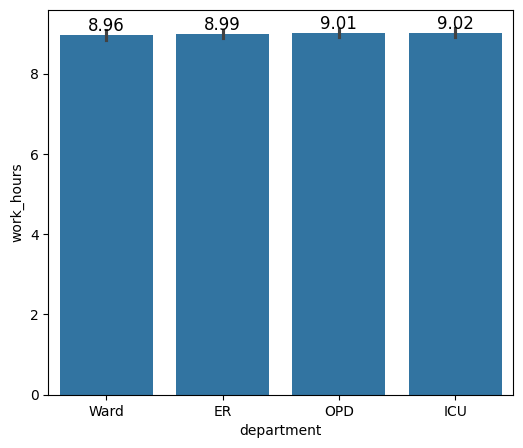

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x='department', y='work_hours', data=df1, ax=ax)
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=12
    )

###Question 2: Machine Learning Mini Task
Question 2.1: Train a logistic regression model to determine who will passed_exam

In [149]:
import pandas as pd
url2 = 'https://drive.google.com/file/d/1A8JVygr_iGHNN6glCfegRE3OrZSOVSXs/view'
url2 = 'https://drive.google.com/uc?id=' + url2.split('/')[-2]
df2 = pd.read_csv(url2)
df2.head()

,age,experience_years,training_hours,passed_exam
0,45,4,31,1
1,25,8,16,0
2,36,1,35,0
3,46,10,36,1
4,56,1,36,0


In [150]:
df2.shape

(2000, 4)

In [151]:
# Drop duplicates
df2 = df2.drop_duplicates()
df2.shape

(1905, 4)

In [152]:
df2.isnull().sum()

,0
age,0
experience_years,0
training_hours,0
passed_exam,0


Question 2.2: Perform Train/Test Split (80/20)

In [153]:
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

#Reshaped for Logistic function.
X = df2.drop('passed_exam', axis=1)
y = df2['passed_exam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Question 2.3: Evaluate model with Accuracy and report Confusion Matrix

In [154]:
# Train the model
model = LogisticRegression().fit(X_train,y_train)
# Test the model
y_pred = model.predict(X_test)

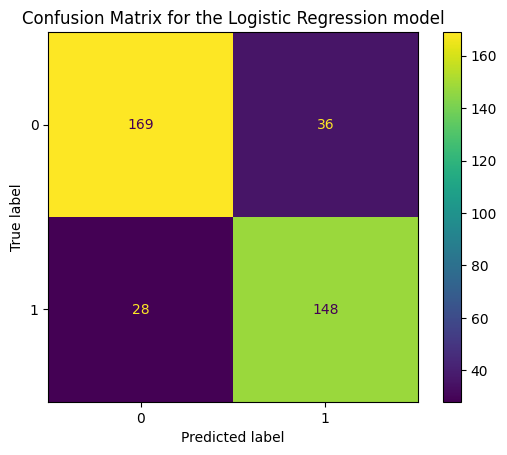

Accuracy of the Logistic Regression model on the test set:, 0.8320
Precision of the Logistic Regression model on the test set:, 0.8043
Recall of the Logistic Regression model on the test set:, 0.8409
Coefficients table


In [155]:
# Evaluate the model predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for the Logistic Regression model')
plt.show()

print(f"Accuracy of the Logistic Regression model on the test set:, {accuracy:.4f}")
print(f"Precision of the Logistic Regression model on the test set:, {precision:.4f}")
print(f"Recall of the Logistic Regression model on the test set:, {recall:.4f}")
print("Coefficients table")

Question 2.4: Briefly explain which variable have the highest impact on passed_exam from coefficients

In [156]:
coeff = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0].round(4)
}).sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
print(coeff)
print("The variable with the highest impact is " + coeff['Feature'][0] + " with the highest weight of " + str(coeff['Coefficient'][0]))

            Feature  Coefficient
0  experience_years       0.4696
1    training_hours       0.1971
2               age      -0.0058
The variable with the highest impact is experience_years with the highest weight of 0.4696


###Question 3: Logic & Problem Solving
Question 3.1: Write a python code to create all posibilities of the shift schedule

In [157]:
import itertools
import pandas as pd
# create all possible combinations
doc_list = ['A', 'B', 'C', 'D']
df3 = pd.DataFrame(
    [{'D1S1': doc1, 'D1S2': doc2,
      'D2S1': doc3, 'D2S2': doc4,
      'D3S1': doc5, 'D3S2': doc6,
      'Day1': [doc1, doc2],
      'Day2': [doc3, doc4],
      'Day3': [doc5, doc6]}
     for doc1, doc2, doc3, doc4, doc5, doc6 in itertools.product(doc_list, repeat=6)]
)
# remove the same doc on the same day
df3 = df3[
    (df3['D1S1'] != df3['D1S2']) &
    (df3['D2S1'] != df3['D2S2']) &
    (df3['D3S1'] != df3['D3S2'])]
# sort lists of docs e.g. from [B, A] to [A, B]
cols_to_sort = ['Day1', 'Day2', 'Day3']
for col in cols_to_sort:
    df3[col] = df3[col].apply(lambda x: tuple(sorted(x)))
# drop duplicated combinations
df3 = df3.drop_duplicates(subset=['Day1', 'Day2', 'Day3'])
# count 3-day combination
for doc in doc_list:
    df3[doc] = df3[['D1S1', 'D1S2', 'D2S1', 'D2S2', 'D3S1', 'D3S2']].apply(
        lambda row: list(row).count(doc), axis=1
    )
# filter out 3-day
df3 = df3[
    ~(
        (df3['A'] == 3) |
        (df3['B'] == 3) |
        (df3['C'] == 3) |
        (df3['D'] == 3)
    )
]

Question 3.2: Report a DatFrame with Day 1 to 3 as columns and solutions as rows

In [158]:
# keep only day rows
df3 = df3.reset_index()[['Day1', 'Day2', 'Day3']]
print("The number of all shift schedule posibilites is " + str(df3.shape[0]))
print("Thee First 5 Rows of Shift Schedule DataFrame:")
print(df3.head())

The number of all shift schedule posibilites is 114
Thee First 5 Rows of Shift Schedule DataFrame:
     Day1    Day2    Day3
0  (A, B)  (A, B)  (C, D)
1  (A, B)  (A, C)  (B, C)
2  (A, B)  (A, C)  (B, D)
3  (A, B)  (A, C)  (C, D)
4  (A, B)  (A, D)  (B, C)


Question 3.3: Choose 2 best shift schdules and explain the choices

In [159]:
# Filter only solutions that do not have the same pair of doctors for each day
df_final = df3[
    df3.apply(lambda r:
              (r['Day1'] != r['Day2']) and
              (r['Day1'] != r['Day3']) and
              (r['Day2'] != r['Day3']),
              axis=1)
].reset_index(drop=True)
print(df_final)

      Day1    Day2    Day3
0   (A, B)  (A, C)  (B, C)
1   (A, B)  (A, C)  (B, D)
2   (A, B)  (A, C)  (C, D)
3   (A, B)  (A, D)  (B, C)
4   (A, B)  (A, D)  (B, D)
..     ...     ...     ...
91  (C, D)  (B, C)  (A, D)
92  (C, D)  (B, C)  (B, D)
93  (C, D)  (B, D)  (A, B)
94  (C, D)  (B, D)  (A, C)
95  (C, D)  (B, D)  (B, C)

[96 rows x 3 columns]


In [162]:
# Pick a random schedule
import random

random.seed(42)
random_idx_1 = random.randint(0, len(df_final)-1)
random_row_1 = df_final.iloc[random_idx_1, :].tolist()

# Keep rows that do NOT contain any value from the random row
df_final_filtered = df_final[~df_final.apply(lambda row: any(x in random_row_1 for x in row), axis=1)]

# Pick a random second schedule
random_idx_2 = random.randint(0, len(df_final_filtered)-1)
random_row_2 = df_final_filtered.iloc[random_idx_2, :].tolist()


print("The first shift schedule")
print("Day 1: " + str(random_row_1[0]))
print("Day 2: " + str(random_row_1[1]))
print("Day 3: " + str(random_row_1[2]))
print("The second shift schedule")
print("Day 1: " + str(random_row_2[0]))
print("Day 2: " + str(random_row_2[1]))
print("Day 3: " + str(random_row_2[2]))

The first shift schedule
Day 1: ('C', 'D')
Day 2: ('A', 'B')
Day 3: ('A', 'D')
The second shift schedule
Day 1: ('A', 'C')
Day 2: ('B', 'C')
Day 3: ('B', 'D')


### Rationales behind these two chosen schedules

The best schedules should not have the pair of doctors on each day and each doctor should have the same number of shifts.

However, in one schedule, doctors cannot work the same number restricted by the number of shifts available.

The solution is to pick the first schedule for the first month or week and another schedule for another month or week.

In summary, each doctor has 3 shifts from 2 different schedules and they will not meet the same colleague each shift they work.